## Data Quality Control and Pre-processing

In [117]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           1.2.0
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.10.2
ipykernel           6.17.0
ipython_genutils    0.2.0
jedi                0.18.1
joblib              1.2.0
jupyter_server      1.21.0
kiwisolver          1.4.4
leidenalg           0.9.0
llvmlite            0.39.1
matplotlib          3.6.2
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.56.3
numpy               1.23.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
pexpect             4.8.0
picklesh

In [140]:
# adata = sc.read_10x_mtx(
#     '../data/ST-HCC-2L/HCC-2L/raw_feature_bc_matrix',
#     var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
#     cache=True
#     )
# adata = sc.datasets.visium_sge("ST-HCC-2L")
adata = sc.read_visium("./data/ST-HCC-2L")
adata.var_names_make_unique()
# adata  = sc.datasets.visium_sge(sample_id="ST-HCC-2L")
# adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")

# coordinates = pd.read_csv('../data/ST-HCC-2L/HCC-2L/spatial/tissue_positions_list.csv')
# adata = adata[coordinates.index, :]
# adata.obsm["spatial"] = coordinates.to_numpy()
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

reading data/ST-HCC-2L/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/yuxin/.conda/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [141]:
adata

AnnData object with n_obs × n_vars = 4672 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

/tmp/ipykernel_59044/892761454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
/tmp/ipykernel_59044/892761454.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40,

<AxesSubplot: xlabel='n_genes_by_counts'>

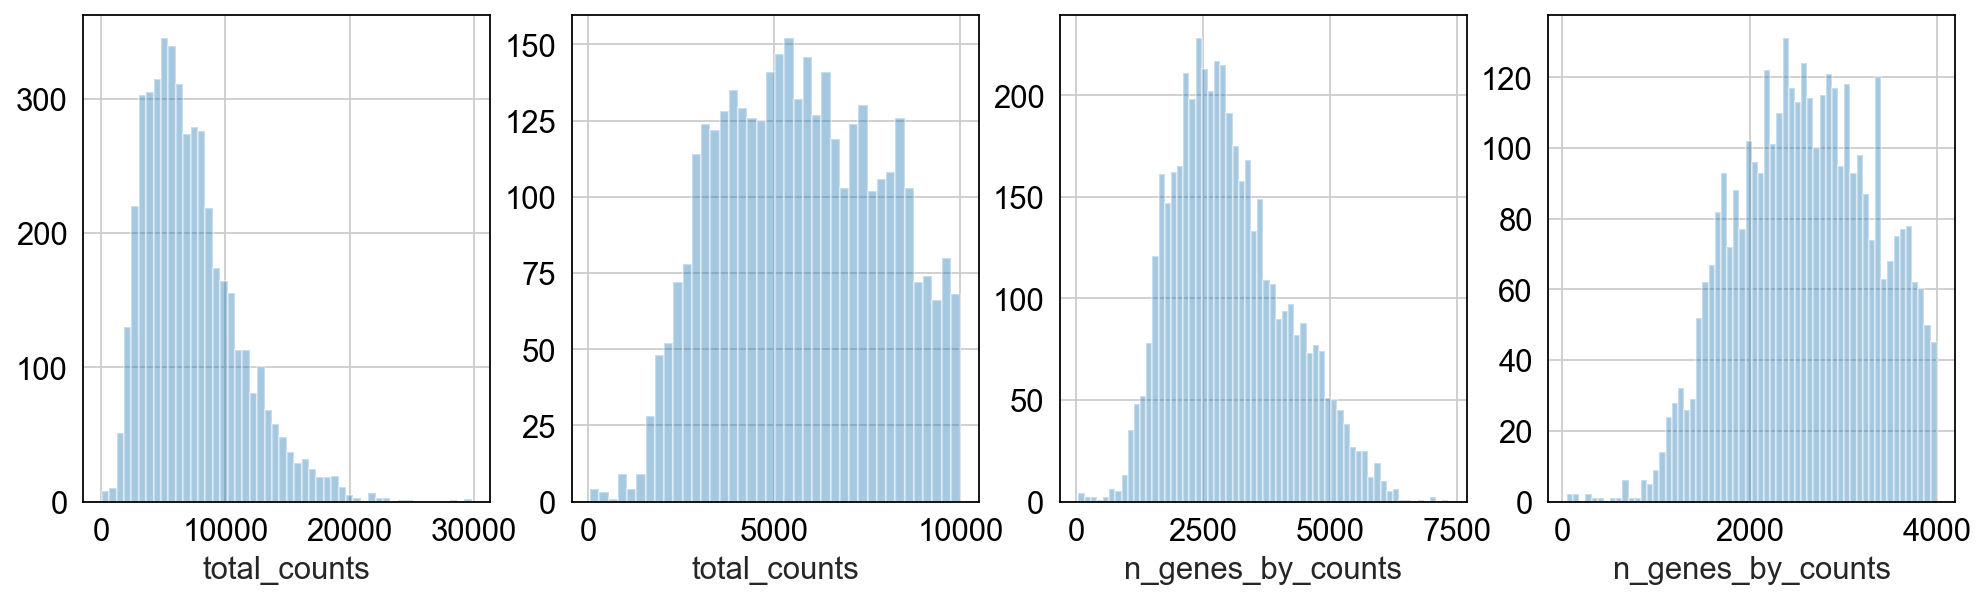

In [142]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [143]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

filtered out 1437 cells that have less than 5000 counts
#cells after MT filter: 3235
filtered out 16365 genes that are detected in less than 10 cells


/home/yuxin/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [144]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


## Unsupervised clustering

In [145]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
running Leiden clustering
    finished: found 8 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


/home/yuxin/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


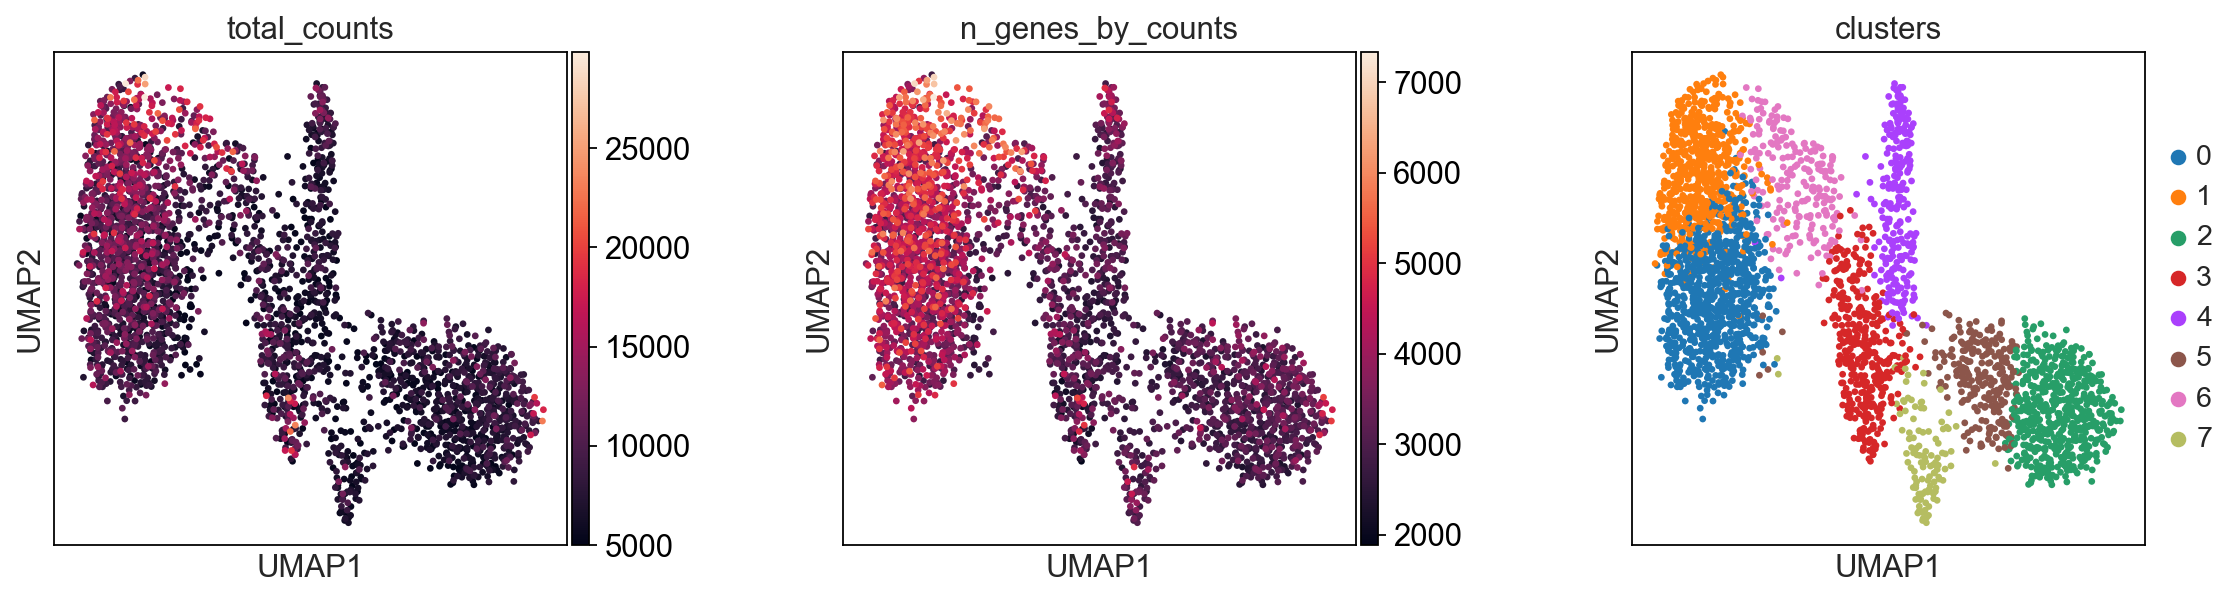

In [146]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

## Find Marker Genes

## Visualize spatial sub-regions

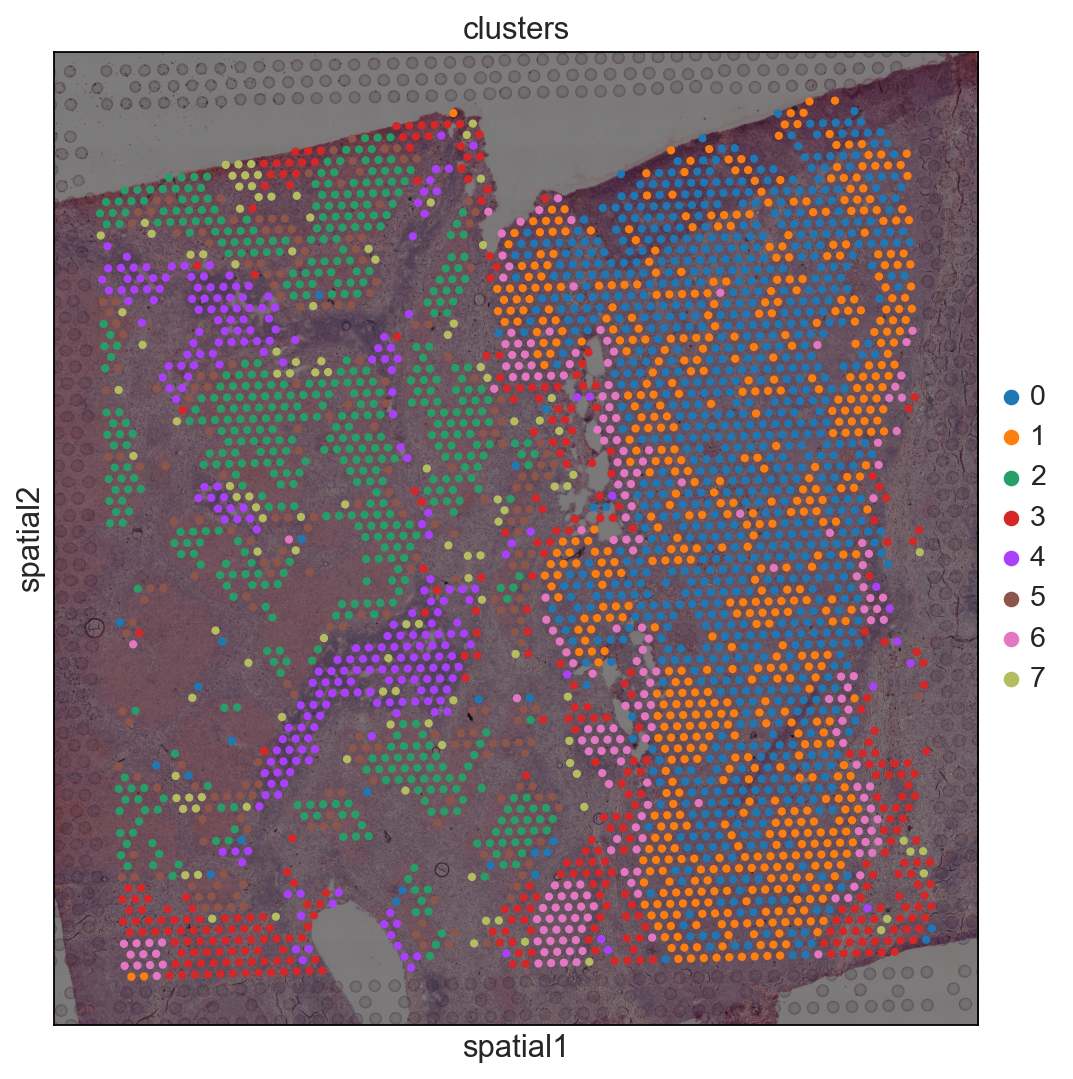

In [149]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color=["clusters"])

## Find Marker Genes

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


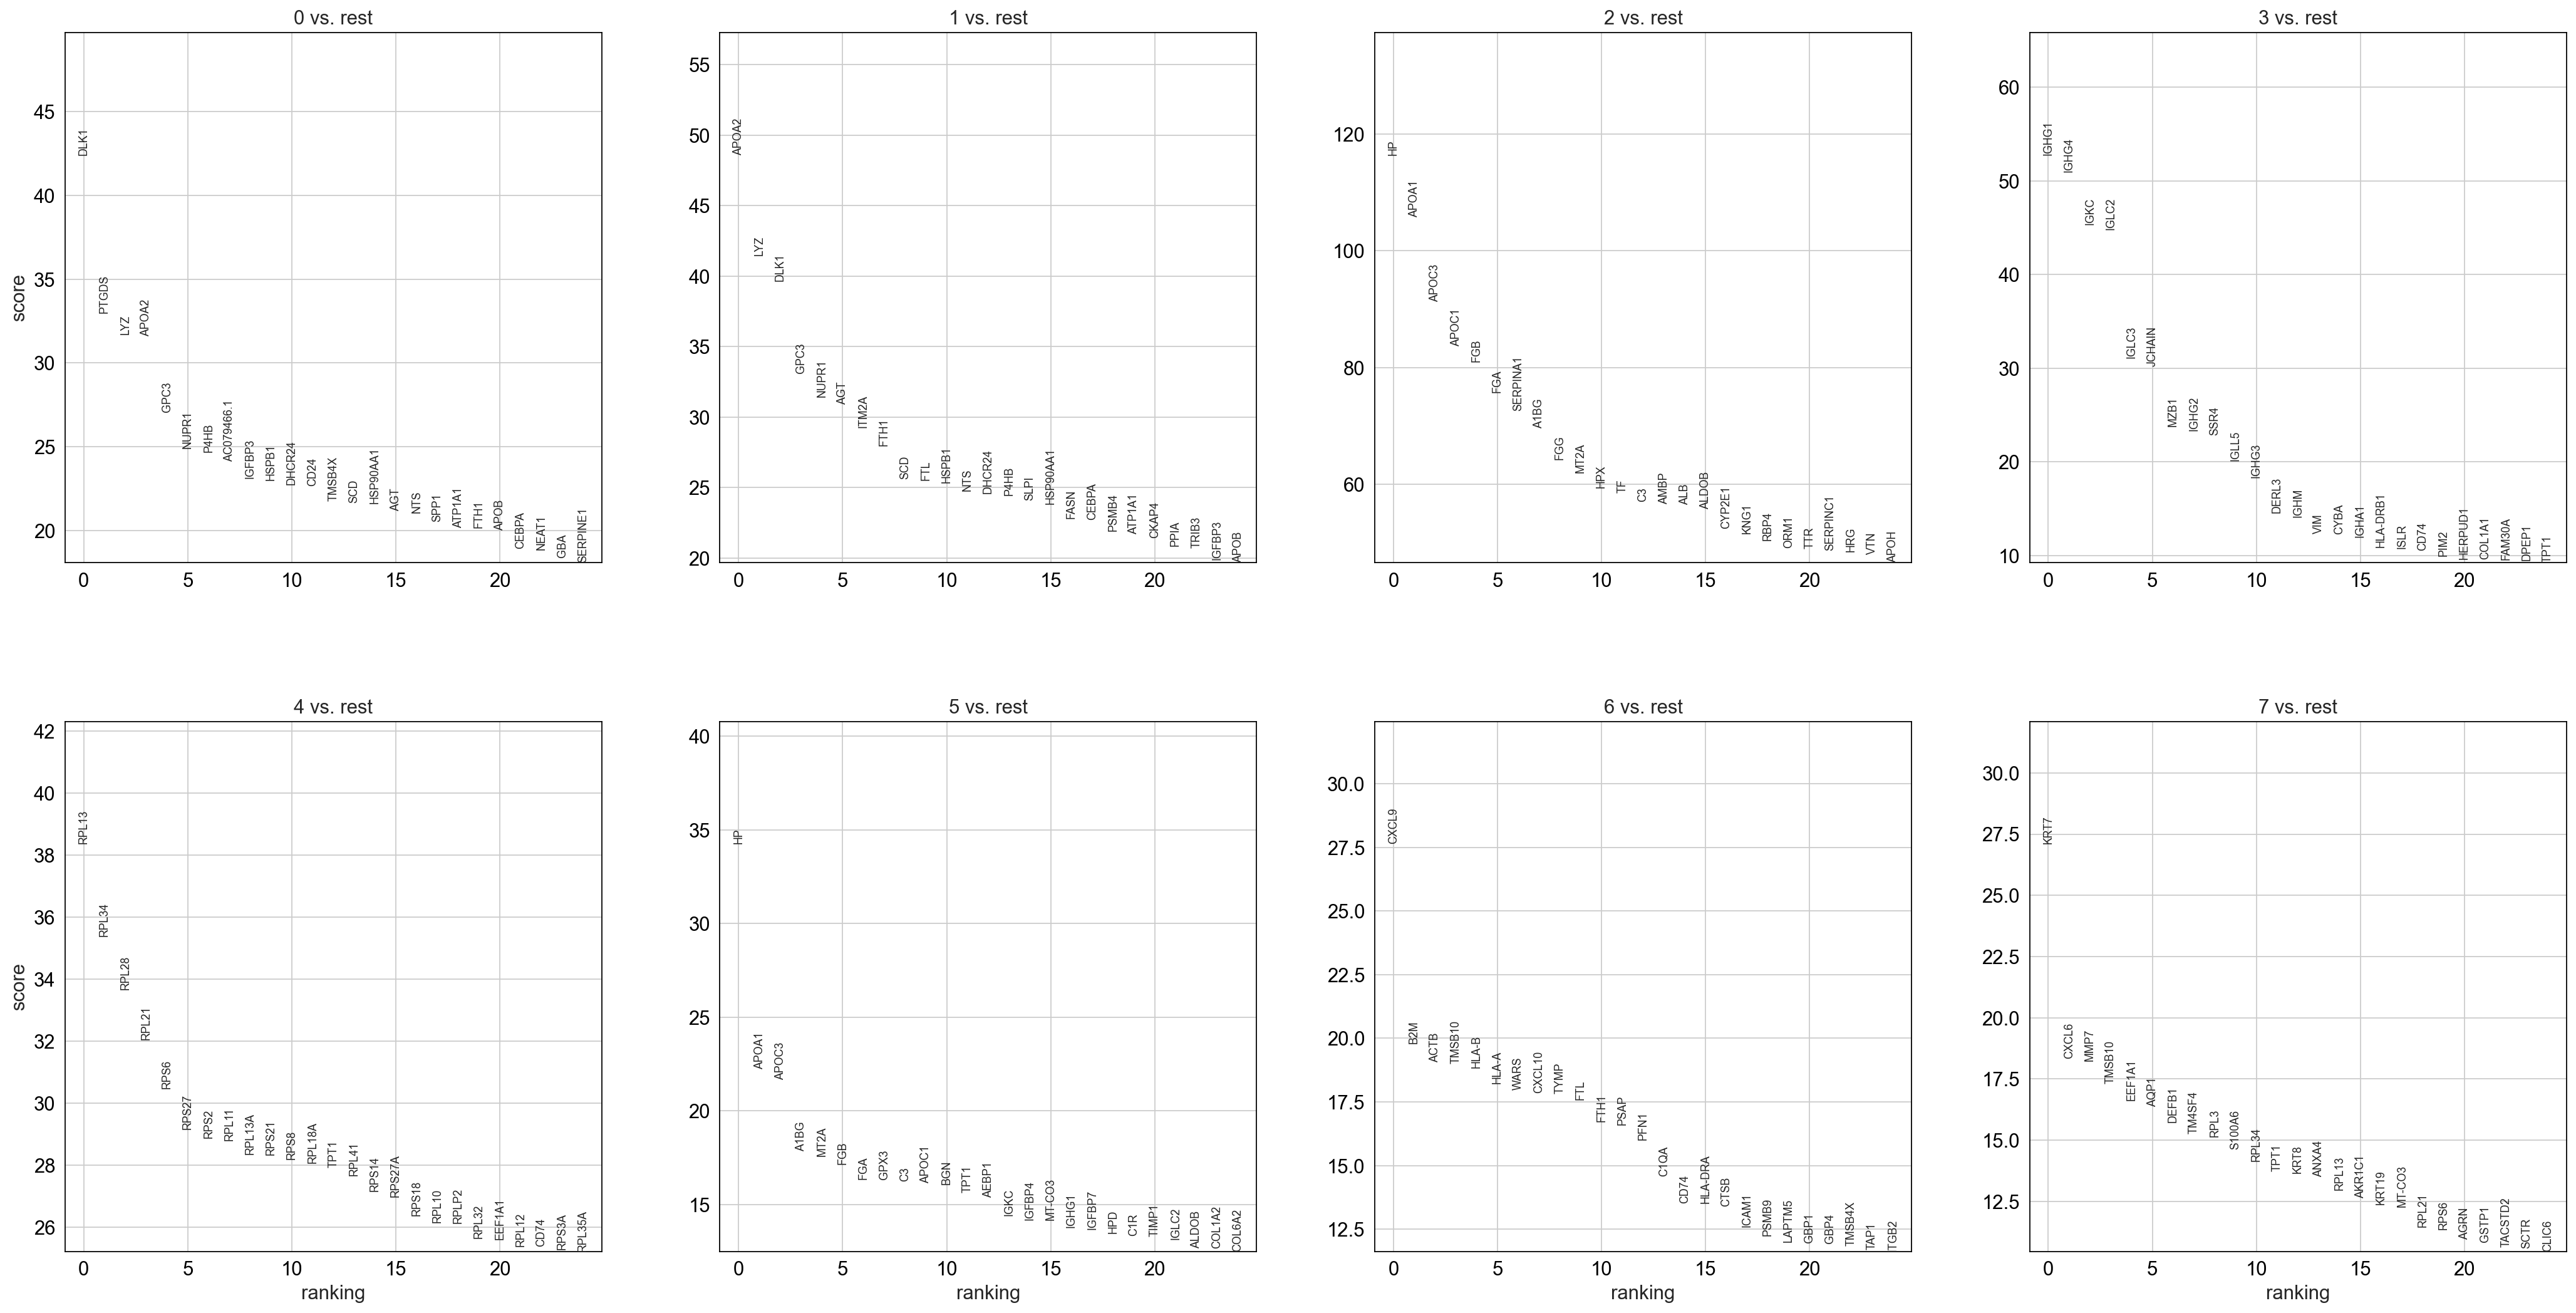

In [151]:
sc.tl.leiden(adata)
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

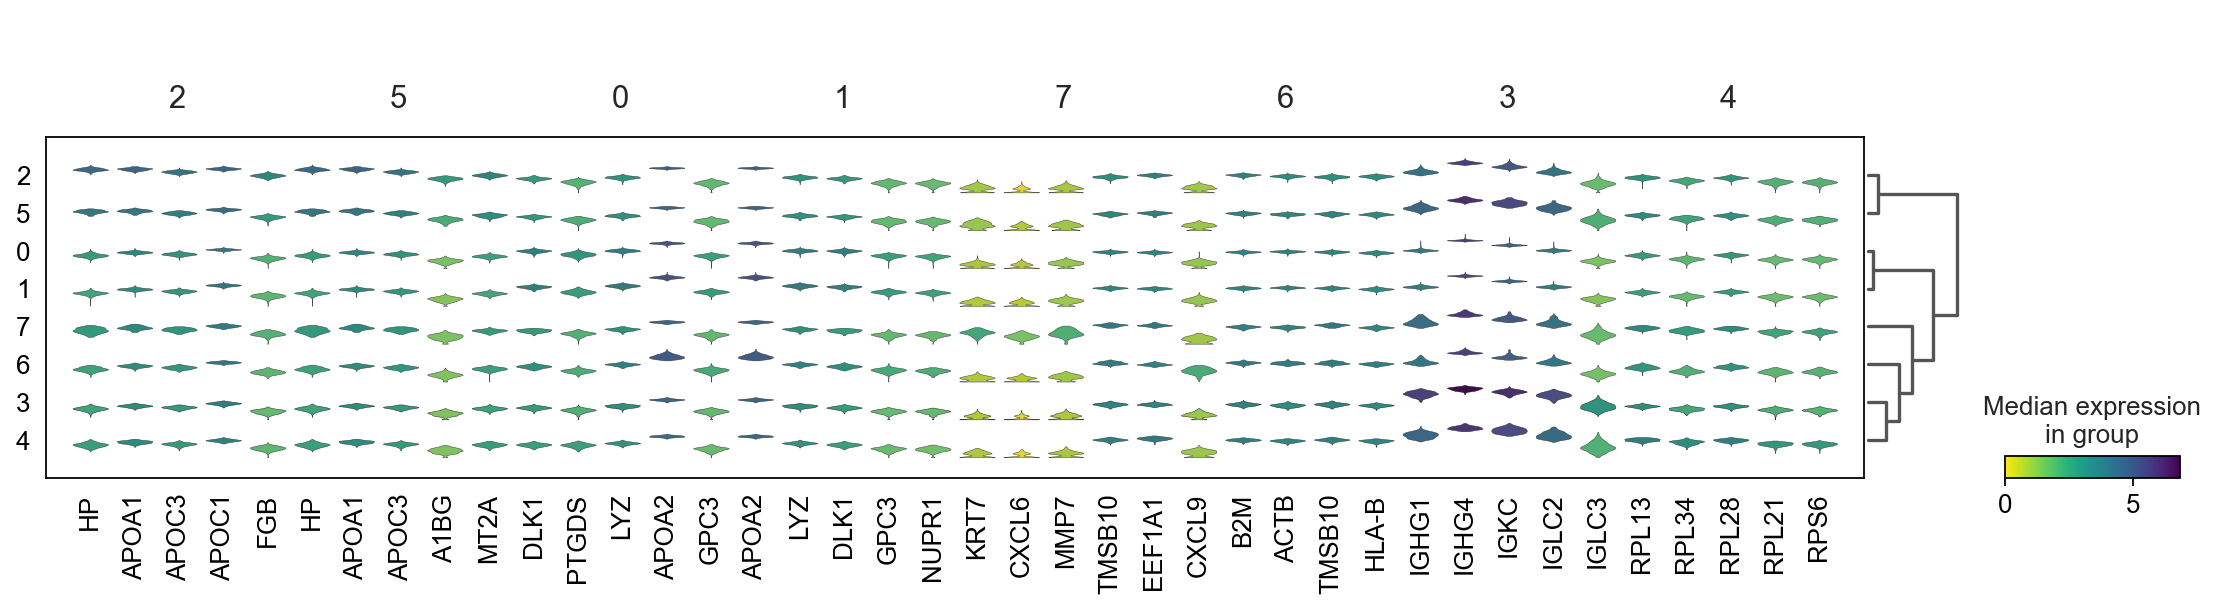

In [165]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, cmap='viridis_r')

| group |       marker cell |     cell type     |
|:------|------------------:|:-----------------:|
| 0     |             PTGDS |    Fibroblasts    |
| 1     | APOA2, DLK1, GPC3 |    Fibroblasts    |
| 2     |           HP, FGB |    Hepatocytes    |
| 3     |             IGHG1 |   Plasma cells    |
| 4     |             RPL34 |        NA         |
| 5     |   HP, A1BG, APOC3 |    Hepatocytes    |
| 6     |             CXCL9 |    Macrophages    |
| 7     | KRT7, CXCL6, MMP7 | Pancreatic cells  |


In [168]:
new_cluster_names = [
    'Fibroblasts(1)', 'Fibroblasts(2)',
    'Hepatocytes(1)', 'Plasma cells',
    'NA', 'Hepatocytes(2)',
    'Macrophages', 'Pancreatic cells'

    ]
adata.rename_categories('leiden', new_cluster_names)

/home/yuxin/.conda/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)
